In [44]:
# Import VGG16 pretrained model as our dataset is very small to be trained on model from scratch 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Load the VGG16 model  
tagrted shape (224,224,3) as our dataset in RGB color

In [45]:
# Load the pretrained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pretrained layers 
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')  # Assuming 4 classes {0: 'Nutrition', 1: 'Fashion', 2:'Games', 3:'Accessories'}
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Prepare the data
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# Train the model
model.fit(train_generator, epochs=8)

# Evaluate the model
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)
loss, accuracy = model.evaluate(test_generator)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Found 45 images belonging to 4 classes.
Epoch 1/8
2/2 [==============================] - 11s 7s/step - loss: 8.7335 - accuracy: 0.3333
Epoch 2/8
2/2 [==============================] - 9s 6s/step - loss: 3.7400 - accuracy: 0.5778
Epoch 3/8
2/2 [==============================] - 9s 7s/step - loss: 0.3793 - accuracy: 0.8889
Epoch 4/8
2/2 [==============================] - 9s 6s/step - loss: 0.1275 - accuracy: 0.9556
Epoch 5/8
2/2 [==============================] - 9s 3s/step - loss: 0.1447 - accuracy: 0.9111
Epoch 6/8
2/2 [==============================] - 9s 6s/step - loss: 0.0137 - accuracy: 1.0000
Epoch 7/8
2/2 [==============================] - 9s 3s/step - loss: 0.0019 - accuracy: 1.0000
Epoch 8/8
2/2 [==============================] - 9s 7s/step - loss: 7.6753e-04 - accuracy: 1.0000
Found 13 images belonging to 4 classes.
1/1 [==============================] - 3s 3s/step - loss: 0.2760 - accuracy: 0.9231
Loss: 0.27604472637176514, Accuracy: 0.9230769276618958


# Save the fine tunned model 

In [46]:
from tensorflow.keras.models import load_model

# Save the model 
model.save('trained_model.h5')

/home/ahmed/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Load the model to make the Inference step

1/1 [==============================] - 0s 231ms/step


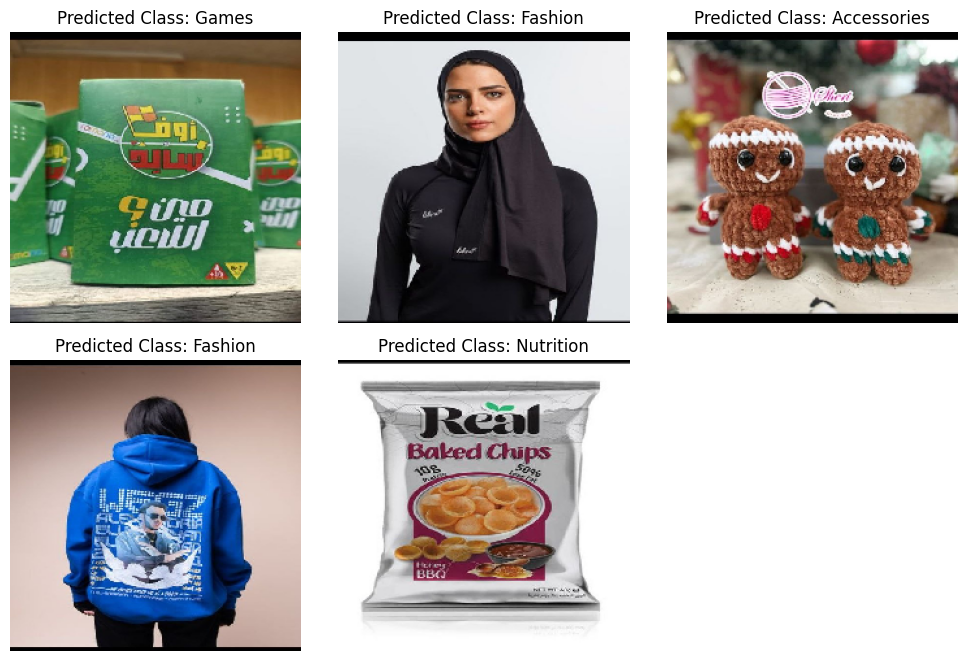

In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your trained model for inference
model = load_model('trained_model.h5')

# Path to the directory containing the images
images_dir = 'Inference/'

# List to store the images and predictions
images = []
class_labels = []

# Assume We have only four categories 
class_labels_dict = {0: 'Nutrition', 1: 'Fashion', 2:'Games', 3:'Accessories'}

# Loop through all the images in the directory
for img_file in os.listdir(images_dir):
    img_path = os.path.join(images_dir, img_file)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize pixel values
    images.append(img)
    pred = model.predict(x)
    predicted_class = np.argmax(pred)
    class_labels.append(class_labels_dict[predicted_class])

# Plot the images with their predicted class labels
plt.figure(figsize=(10, 10))
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f'Predicted Class: {class_labels[i]}')

plt.tight_layout()
plt.savefig('predictions_plot.png')
plt.show()
